# Tarea 3 - Pregunta 2 - Bike Sharing: Predicción de Demanda Horaria
---
# Matías Araya - 201173082-8
# Claudia Hazard - 201404523-9
---

El objetivo de esta sección es predecir la demanda de bicicletas sobre la red de *Capital Bikeshare* de la ciudad de Washington. Todo esto en función de la hora del día y otras variables.

## Objetivo

Entrenar un modelo para obtener un puntaje correspondiente al top-100 del leaderboard final de la competencia de *Bike Sharing Demand de Kaggle*, es decir superior o igual a $0.37748$. Para esto se utiliza la siguiente función de error:

$$E_{bikes} (y, \hat{y}) = \frac{1}{n} \sum_{i} (ln(y_i + 1) - ln(\hat{y_i} + 1))^2 $$

Donde $y$, $\hat{y}$ $\in R^{n}$ denotan los vectores de observaciones y predicciones respectivamente.

## a)

In [11]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
ntest = len(dftest)
print "Numero de datos de entrenamiento: ", ntrain
print "Numero de datos de validacion: ", nval-ntrain
print "Numero de datos de prueba: ", ntest
df = pd.concat([dftrain,dfval,dftest])
print('\nSummary - dataframe completo:\n')
print df.info()
print "-"*80
print "Descripcion de las variables\n"
print df.describe()
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])

Numero de datos de entrenamiento:  6562
Numero de datos de validacion:  2177
Numero de datos de prueba:  2147

Summary - dataframe completo:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 2146
Data columns (total 13 columns):
Unnamed: 0    10886 non-null int64
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(9), object(1)
memory usage: 1.2+ MB
None
--------------------------------------------------------------------------------
Descripcion de las variables

         Unnamed: 0        season       holiday    workingday       weather  \
count  10886.000000  10886.0000

Características más importantes del dataset:

    Numero de datos de entrenamiento: 6562
    Numero de datos de validación: 2177
    Numero de datos de prueba: 2147
    Número total de datos: 10886

Variables

1. **datetime**: Hora y marca temporal. Tipo String.
2. **season**: Temporada del año. Valores posibles: 1,2,3,4. Tipo: Entero.
3. **holiday**: Si el día es considerado vacaciones. Valores: 0,1. Tipo: Entero.
4. **workingday**: Si el día no es fin de semana o vacaciones. Valores: 0,1. Tipo: Entero.
5. **wheater**: Clima (Valores discretos). Valores: 1, 2, 3, 4. Tipo: Entero.
6. **temp**: Temperatura en grados Celsius. Valores: Continuos. Tipo: Flotante.
7. **atemp**: Sensación térmica. Valores: Continuos. Tipo: Flotante.
8. **humidity**: Humedad relativa. Valores: Discretos. Tipo: Entero.
9. **windspeed**: Velocidad del viento. Valores: Continuos. Tipo: Flotante.
10. **casual**: Numero de rentas de usuarios no registrados iniciadas. Valores: Discretos. Tipo: Entero.
11. **registered**: Numero de rentas de usuarios registrados iniciadas. Valores: Discretos. Tipo: Entero.
12. **count**: Numero de rentas totales. Valores: Discretos. Tipo: Entero.

A partir de la descripción del dataset, se puede notar que los valores son muy dispares de una variable a otra, ya que se presentan escalas distintas. Algunos valores son discretos y otros continuos, y en general las desviaciones típicas son muy distintas entre los atributos. Una buena idea en este sentido, seria normalizar los datos para no generar conflictos en los algoritmos de aprendizaje. Notar que la variable objetivo *count* es la suma de *casual* y *registered*

Además, se muestran los histogramas de los atributos anteriores. Notar que el nuevo atributo "hour" corresponde a la hora del día obtenida del atributo datetime y es de tipo entero.

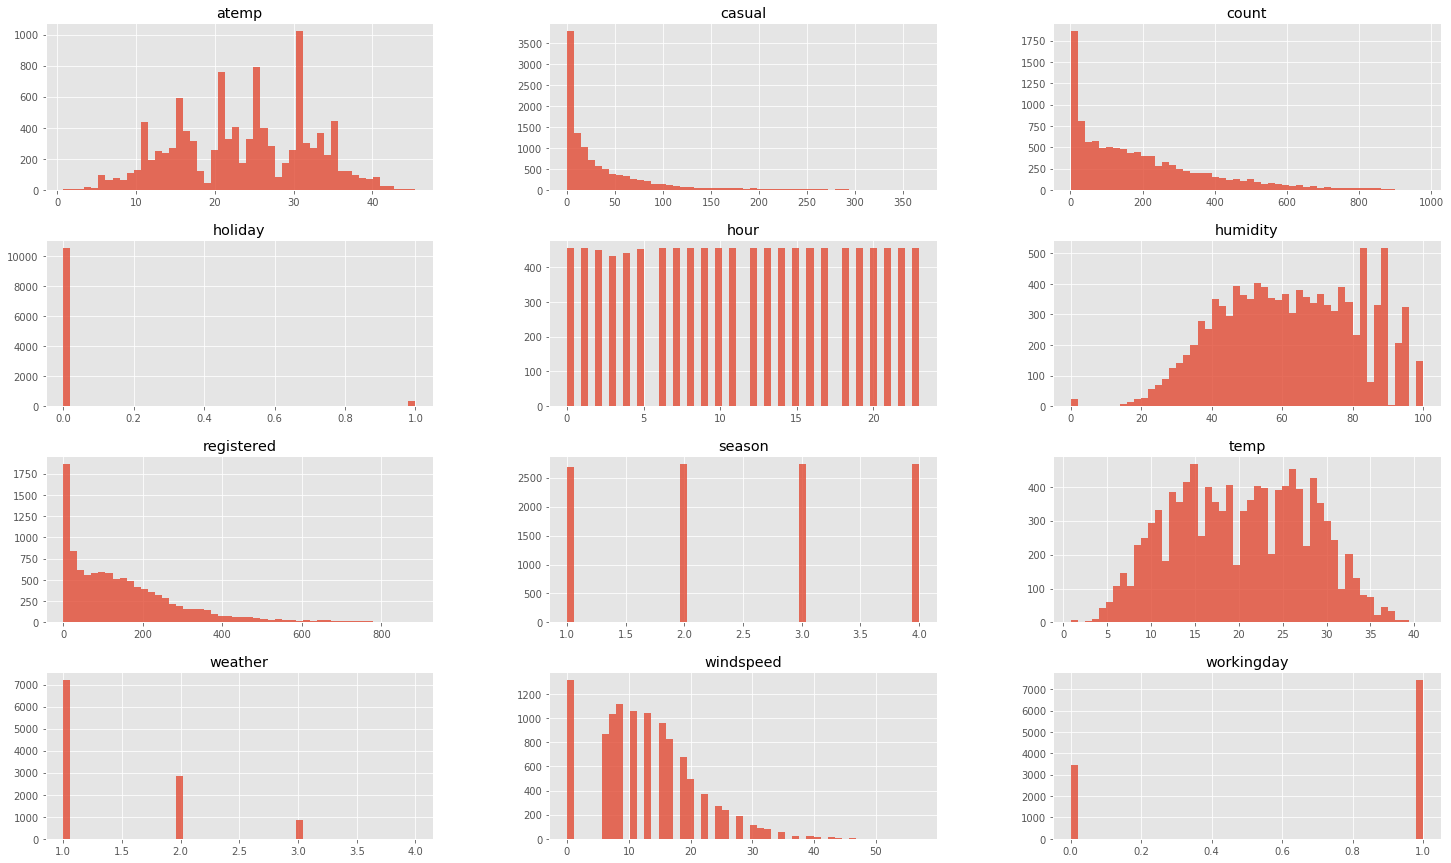

In [12]:
df.iloc[:,1:].hist(figsize=(25, 15),alpha=0.8, bins=50)
plt.show()

Hay que notar que la variable objetivo *count* tiene un sesgo importante hacia la derecha, esto quiere decir que la cantidad de bicicletas que se suelen arrendar en un cierto momento son pocas, es raro que alguien arriende muchas bicicletas en determinado momento.

Se puede notar como las variables temperatura, humedad y velocidad del viento se comportan como era de esperar.

## b)

En esta sección se crea tanto el conjunto de entrenamiento, validación y prueba. Se eligen todos los atributos necesarios para el problema para obtener la variable objetivo **count**. No se agregan los atributos **casual** y **registered** dado que, como se dijo anteriormente, la suma de estos corresponde a la variable objetivo **count**.

Con los datos ya separados, se crea un modelo de tipo Árbol de Clasificación. Así se puede predecir el **count** para cada conjunto y ocupar la función de evaluación de error vista anteriormente.

SCORE TEST=0.703388
KAGG EVAL TRAIN =0.028516
KAGG EVAL VAL =0.554511
KAGG EVAL TEST =0.574239


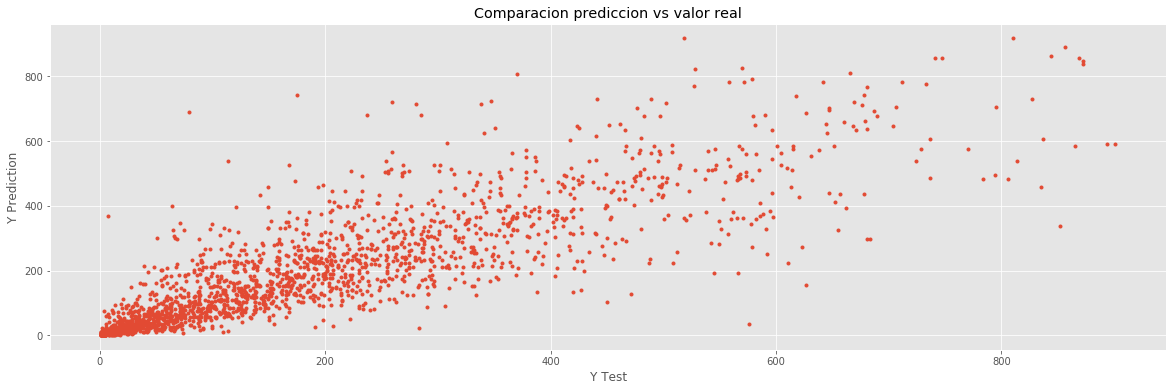

In [36]:
from sklearn.tree import DecisionTreeRegressor as Tree

def eval_bikemodel(y_predict,y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))

Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour']]

Ydf=df.ix[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = Tree(random_state=0)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)
print "SCORE TEST=%f"%score_test

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)
print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val
print "KAGG EVAL TEST =%f"%kagg_test

plt.figure(1, figsize=(20, 6))
plt.xlabel("Y Test")
plt.ylabel("Y Prediction")
plt.title("Comparacion prediccion vs valor real")
plt.plot(Y_test,Y_pred_test,'.')
plt.show()

Con los resultados obtenidos se puede notar que el score en el conjunto de prueba es de un $0.70$. Mientras que si se evalua con la función dada por la competencia se tiene para el conjunto de entrenamiento, validación y prueba:

    KAGG EVAL TRAIN: 0.028516
    KAGG EVAL VAL: 0.554511
    KAGG EVAL TEST: 0.574239
    
Con este resultado para el set de prueba con un puntaje menor a $0.59$ deja al modelo en una posición inferior a 2140 de la competencia.

Además se puede ver en el gráfico que el modelo predice muy bien cuando el valor es pequeño, en el primer cuadrante, y falla cuando los valores empiezan a crecer. Esto se debe, como se ve en los histogramas, que se tiene una gran cantidad de datos para valores pequeños pero pocos cuando la variable **count** es mayor.

## c)

Lo que se realiza en esta sección es mejorar el comportamiento del modelo de la sección anterior. Esto se realiza cambiando los hiperparámetros del modelo. Los que se cambian son la **profundidad máxima del árbol** como también la **mínima cantidad de hojas** que tiene este. Para el caso de la profundidad máxima se entrena el modelo variando el número de esto de $2$ a $31$. Luego se verifica la mejora con el conjunto de validación y se elige el mejor parámetro.

Se realiza el mismo procedimiento para la mínima cantidad de hojas, donde se prueba desde $1$ a $50$. La combinación de estos dos mejores hiperparámetros escogidos será el modelo adecuado.

Como se sabe, estas dos técnicas son de gran ayuda para combatir para el gran overfitting que presentan usualmente los árboles de clasificación.

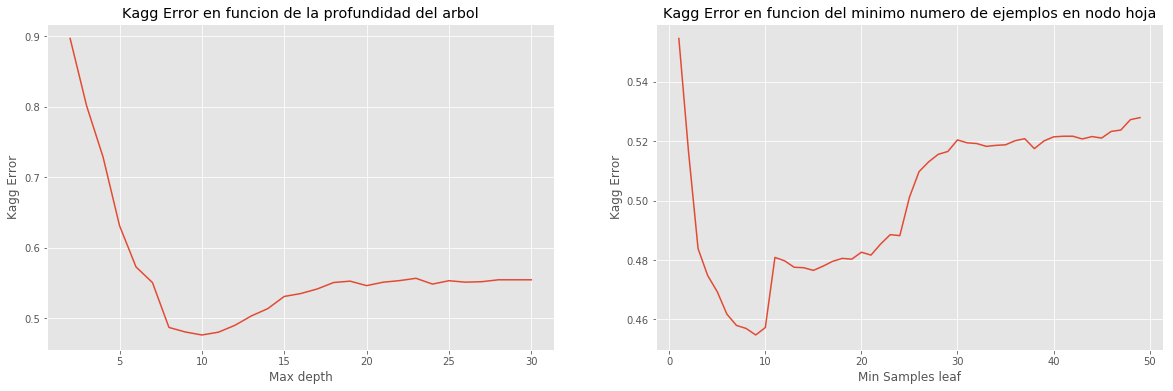

BEST KAGG EVAL VAL =0.476274, DEPTH: 10.000000 
BEST KAGG EVAL VAL =0.454764, leaf_samples: 9.000000 
BEST KAGG EVAL TEST =0.493948 


In [28]:
kagg_list_val = []
for i in range(2,31):
    model = Tree(random_state=0,max_depth=i)
    model.fit(X_train,Y_train)
    Y_pred_val = model.predict(X_val)
    kagg_val = eval_bikemodel(Y_pred_val,Y_val)
    kagg_list_val.append(kagg_val)

iaux = kagg_list_val.index(min(kagg_list_val))   
best_depth = [iaux, kagg_list_val[iaux]]

plt.figure(1, figsize=(20, 6))
plt.subplot(121)
plt.xlabel("Max depth")
plt.ylabel("Kagg Error")
plt.title("Kagg Error en funcion de la profundidad del arbol")
plt.plot(range(2,31),kagg_list_val)

kagg_list_val = []
for i in range(1,50):
    model = Tree(random_state=0,min_samples_leaf=i)
    model.fit(X_train,Y_train)
    Y_pred_val = model.predict(X_val)
    kagg_val = eval_bikemodel(Y_pred_val,Y_val)
    kagg_list_val.append(kagg_val)

iaux = kagg_list_val.index(min(kagg_list_val))    
best_leaf = [iaux, kagg_list_val[iaux]] 
    
plt.subplot(122)
plt.xlabel("Min Samples leaf")
plt.ylabel("Kagg Error")
plt.title("Kagg Error en funcion del minimo numero de ejemplos en nodo hoja")
plt.plot(range(1,50),kagg_list_val)
plt.show()

#Kagg test
model = Tree(random_state=0,min_samples_leaf=best_leaf[0]+1, max_depth=best_depth[0]+2)
model.fit(X_train,Y_train)
Y_pred_test = model.predict(X_test)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)


print "BEST KAGG EVAL VAL =%f, DEPTH: %f "%(best_depth[1],best_depth[0]+2)
print "BEST KAGG EVAL VAL =%f, leaf_samples: %f "%(best_leaf[1],best_leaf[0]+1)

print "BEST KAGG EVAL TEST =%f "%(kagg_test)

En los gráficos se puede ver la variación del error por la profundidad del árbol, como también el mínimo número de ejemplos en nodo hoja.

Para el caso de la profundidad del árbol, en el gráfico se ve como baja rápidamente en los primeros 10 níveles y luego el error comienza a subir paulatinamente. Mientras que para el caso de los nodos hojas, estos también bajan rápidamente pero luego también suben rápidamente por lo que una equivocación en esta elección llevaría a un resultado mucho peor.

Escogiendo los mejores hiperparámetros, los cuales dieron de una profundiad de $10$ y nodos ejemplos de $9$, se tiene un error de prueba de $0.493948$. Lo que es mucho mejor a lo obtenido en la pregunta anterior de $0.574239$.

## d)

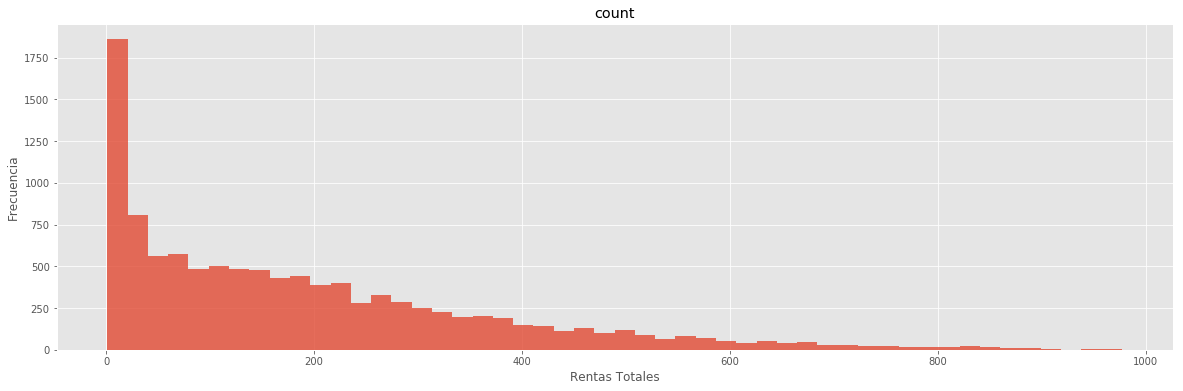

In [37]:
df.ix[:,['count']].hist(figsize=(20, 6),alpha=0.8, bins=50)
plt.ylabel("Frecuencia")
plt.xlabel("Rentas Totales")
plt.show()

Como se puede ver en el histograma de la variable **count**, esta demasiado sesgada hacia la izquierda por lo que convendría una normalización de los datos y así poder prevenir outliers por la distribucíon de los datos.

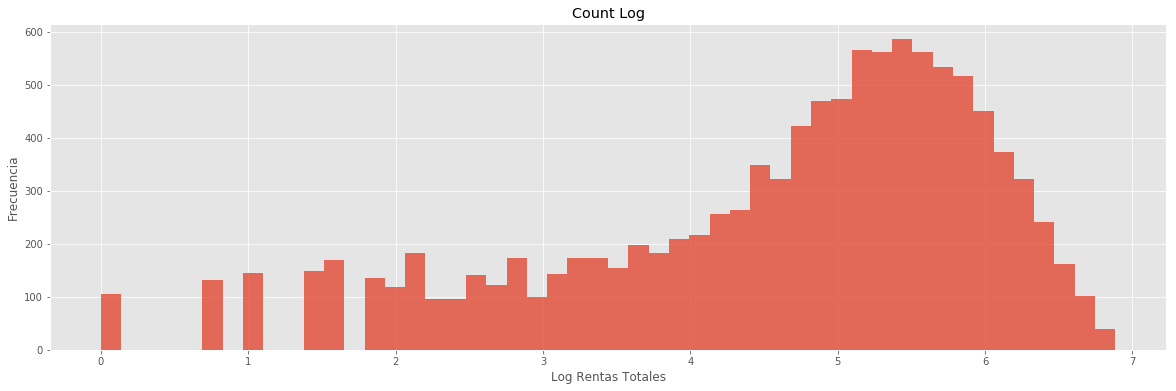

In [38]:
np.log(df.ix[:,['count']]).hist(figsize=(20, 6), alpha=0.8, bins=50)
plt.ylabel("Frecuencia")
plt.xlabel("Log Rentas Totales")
plt.title("Count Log")
plt.show()

Para la normalización se aplica **logaritmo** de la variable **count**. Esto debido a que como se puede ver en el gráfico anterior la distribución de los datos queda más normal. Todavía existe un sesgo pero es enormemente menor al visto anteriormente.

Para obtener mayor información de los datos y así llegar a mejores resultados se extrae el día de la semana y año donde solo hay dos posibles 2011 y 2012 lo que puede mejorar modelo. Esto no se realiza en las versiones anteriores del modelo donde solo se extrae la hora.

In [45]:
from sklearn.preprocessing import StandardScaler
#Normalizacion
scaler = StandardScaler()

df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek#0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])
df['year'] = pd.to_datetime(df['datetime']).dt.year
df['year'] = pd.to_numeric(df['year'])
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday','year']]
Xdf2=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour']]

Ydf=np.log(df.ix[:,'count']) #Normalizacion logaritmica

X_train = Xdf2[0:ntrain].values
X_val = Xdf2[ntrain:nval].values
X_test = Xdf2[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = Tree(random_state=0,min_samples_leaf=9, max_depth=10)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(np.exp(Y_pred_train),np.exp(Y_train))
kagg_val = eval_bikemodel(np.exp(Y_pred_val),np.exp(Y_val))
kagg_test = eval_bikemodel(np.exp(Y_pred_test),np.exp(Y_test))
print "Modelo utilizando logaritmo en count"
print "SCORE TEST=%f"%score_test
print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val
print "-----------------------------------------------------------------------------------"

X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values

model = Tree(random_state=0,min_samples_leaf=9, max_depth=10)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(np.exp(Y_pred_train),np.exp(Y_train))
kagg_val = eval_bikemodel(np.exp(Y_pred_val),np.exp(Y_val))
kagg_test = eval_bikemodel(np.exp(Y_pred_test),np.exp(Y_test))

print "Modelo utilizando logaritmo en count, agregando dia y año"
print "SCORE TEST=%f"%score_test
print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val
print "-----------------------------------------------------------------------------------"

print "KAGG luego de todas las mejoras:"
print "KAGG EVAL TEST =%f"%kagg_test

Modelo utilizando logaritmo en count
SCORE TEST=0.868841
KAGG EVAL TRAIN =0.408218
KAGG EVAL VAL =0.464531
-----------------------------------------------------------------------------------
Modelo utilizando logaritmo en count, agregando dia y año
SCORE TEST=0.892890
KAGG EVAL TRAIN =0.342649
KAGG EVAL VAL =0.402184
-----------------------------------------------------------------------------------
KAGG luego de todas las mejoras:
KAGG EVAL TEST =0.449639


Como era de esperar el modelo mejoro bastante con los cambios realizados. Recordar que hasta ahora el mejor KAGG EVAL TEST era de $0.493948$.

Con todos los cambios realizados, es decir, aplicando logaritmo a la variable **count** y agregando los atributos día y año se llega a un KAGG EVAL TEST de $0.449639$. Con esto ya se estaría dentro del top 1000 de la competencia.

Notar que se tuvo que realizar una cambio a la función de validación dada la transformación logarítmica, donde ahora se calcula la exponencial de la variable objetivo.